<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day12_NotesScikit_Learn_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 12 Notes: Introduction to [Scikit-Learn](https://scikit-learn.org/stable/modules/classes.html)

The overall algorithm for scikit-learn (sklearn) is:
0. Load Libraries
1. Load data
2. Split Data: use `train_test_split()`
3. Create a classifier/regressor object
4. Call `fit()` (to train the model)
5. Call `predict()` to get the predictions
6. Call a metric function to measure performance

In the cell below, we do steps 0-2:

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

In [ ]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(random_state = 0)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
-------------------------------------------------------
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0               10               1
Iris-virginica             0                2               8


## Exercise #1A
Check out the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=neighbors#sklearn.neighbors.KNeighborsClassifier):

Find the documentation for the kNN classifier (i.e., the classifier, not an unsupervised algorithm). Answer the following questions:
- What is the default value of k it uses?
- Does it do weighted or unweighted kNN by default?



[docs for knn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

## Exercise #1B
Implement SciKit Learn’s KNN function
- Run with k=100 (what is the parameter that SciKit Learn uses for k?) What is the accuracy?
- Run with k=100 weighted vs. non-weighted. What is the accuracy?
- Run with k=5. What is the accuracy?


In [ ]:
# here's a hint:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier() # may need to pass in some parameters here..
neigh.fit(train_data,train_sln)


KNeighborsClassifier()

In [ ]:
# code for exercise #3
# default: 5
# default: uniform (unweighted)

# non weighted
neigh = KNeighborsClassifier(weights = "uniform", n_neighbors=100)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data,train_sln)
#5. Call predict to generate predictions
iris_predictions = neigh.predict(test_data)
#6. Call a metric function to measure performance
print("NON WEIGHTED Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

NON WEIGHTED Accuracy: 0.8


In [ ]:
# weighted
neigh = KNeighborsClassifier(weights = "distance", n_neighbors=100)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data,train_sln)
#5. Call predict to generate predictions
iris_predictions = neigh.predict(test_data)
#6. Call a metric function to measure performance
print("WEIGHTED Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

WEIGHTED Accuracy: 0.9333333333333333


small values of k (e.g. k = 5)

In [ ]:
# non weighted
neigh = KNeighborsClassifier(weights = "uniform", n_neighbors=5)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data,train_sln)
#5. Call predict to generate predictions
iris_predictions = neigh.predict(test_data)
#6. Call a metric function to measure performance
print("NON WEIGHTED K=5 Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

NON WEIGHTED K=5 Accuracy: 0.9666666666666667


In [ ]:
# weighted
neigh = KNeighborsClassifier(weights = "distance", n_neighbors=5)
#4. Call fit (to train the classification/regression model)
neigh.fit(train_data,train_sln)
#5. Call predict to generate predictions
iris_predictions = neigh.predict(test_data)
#6. Call a metric function to measure performance
print("WEIGHTED K=5  Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

WEIGHTED K=5  Accuracy: 0.9666666666666667


## Let's try regression now:


In [ ]:
import pandas
import numpy

# load WineQuality.csv data 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/winequality-white.csv')

# set the predictor variables and target variable
target= 'quality'
predictors = wine_data.columns.drop(target) # use all of the columns except for quality

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = \
        train_test_split(wine_data[predictors], wine_data[target], test_size = 0.2, random_state=41)
train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.70
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.50
1366,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.80
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.10
1456,6.0,0.54,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55
...,...,...,...,...,...,...,...,...,...,...,...
407,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.80
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.20
321,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.70
1104,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.40


In [ ]:
from sklearn import neighbors
from sklearn import metrics

# create our model
neigh = neighbors.KNeighborsRegressor() ### Don't miss this! Doing Regression here!!

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.5618749999999999
r2:  0.10189810189810189


## Normalizing Data
Whoa! This is so easy! SciKit Learn is awesome!!

In [ ]:
# Normalization code using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# now I can use train_data_normalized and test_data_normalized

# Exercise #2
- Run kNN regressor algorithm with k (n_neighbors) = 15
- Run again with normalized values
- Which provides a better R^2?


In [ ]:
print("NOT NORMALIZED k=15")
from sklearn import neighbors
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=15) ### Don't miss this! Doing Regression here!!

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)


# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

NOT NORMALIZED k=15
MSE:  0.5325694444444444
r2:  0.14874014874014874


In [ ]:
from sklearn import neighbors
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=15) ### Don't miss this! Doing Regression here!!

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)

print("NORMALIZED k = 15")
# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

ValueError: ignored

## Exercise #2B
Create a graph with k values on the x-axis and R^2 values on the y-axis...

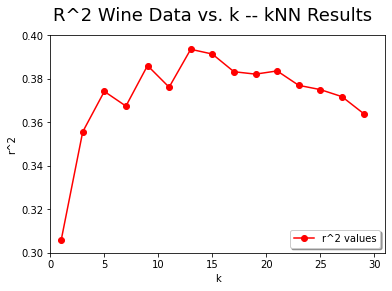

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

k_vals = range(1,31,2)
r2_vals = []

for k in k_vals:
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.fit(train_data_normalized, train_sln)
    predictions = neigh.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)

plt.suptitle('R^2 Wine Data vs. k -- kNN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,.3,.4])
plt.show()

## Exercise #3

Hypothesis #1: low values for the max depth a decision tree will cause low R^2 values. Increasing the max depth will increase the R^2 values; At a certain point, increasing the max depth will no longer have an effect on the R^2 values;

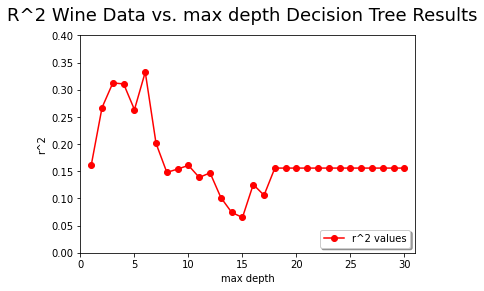

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

max_depth_vals = range(1,31)
r2_vals = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val)
    dt.fit(train_data,train_sln)
    predictions = dt.predict(test_data)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)
    
plt.suptitle('R^2 Wine Data vs. max depth Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('r^2')
plt.plot(max_depth_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,0,.4])
plt.show()

Hypothesis #2: normalization does not affect decision trees metrics


MSE: 0.0
MSE: 0.0
MSE: 0.0
MSE: 0.0
MSE: 0.0
MSE: 0.0
MSE: 0.0
MSE: 0.0024199999999999994
MSE: 0.003555555555555554
MSE: 0.003125
MSE: 0.0035526312264231837
MSE: 0.025807507396449707
MSE: 0.0374202806122449
MSE: 0.028125
MSE: 0.03125
MSE: 0.034375
MSE: 0.0375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375
MSE: 0.034375


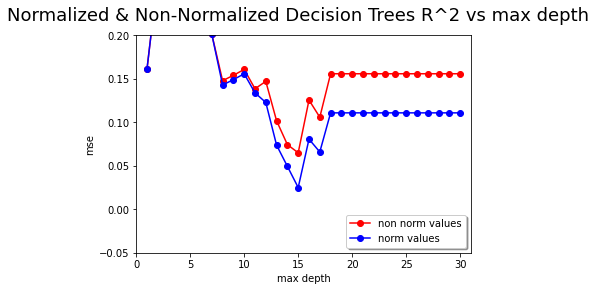

In [ ]:
max_depth_vals = range(1,31)
non_norm = []
norm = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val)
    dt.fit(train_data,train_sln)
    predictions = dt.predict(test_data)
    non_norm.append(metrics.r2_score(test_sln, predictions))

    dt_norm = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val)
    dt_norm.fit(train_data_normalized,train_sln)
    predictions_normalized = dt_norm.predict(test_data_normalized)
    norm.append(metrics.r2_score( test_sln,predictions_normalized))
    print("MSE:",metrics.mean_squared_error( predictions,predictions_normalized ))

plt.suptitle('Normalized & Non-Normalized Decision Trees R^2 vs max depth',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('mse')
plt.plot(max_depth_vals,non_norm,'ro-',label='non norm values')
plt.plot(max_depth_vals,norm,'bo-',label='norm values')

plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,-.05,.2])
plt.show()